<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ. <b>K-Means кластеризация</b></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin.study@yandex.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Варианты</a></li>
        <li><a href="#2">Задание</a></li>
    </ol>
</div>

Подключение стилей оформления

In [1]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [2]:
surname = "Корюкин" #Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 1 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  1


<div class="msg-block msg-warning">
  <p class="msg-text-warn">Варианты могут не совпадать с предыдущими ДЗ</p>
</div>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Задание</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><b>Задание 1</b></p>

<ol>
    <li>Загрузить исходные данные - файл <b>"Cluster_A8_T1.csv"</b></li>
    <li>Построить графики X1-X2, X1-X3, X2-X3</li>
    <li>Построить графики X1-X2-Y, X1-X3-Y, X2-X3-Y (Y - реальные кластеры)</li>
    <li>Произвести кластеризацию методом KMean и построить два графика NInit-ARS для init=Random и init=K-Means++, где
<br><b>NInit</b> - количество повторений выполнения алгоритма кластеризации - от 1 до 40, 
<br><b>ARS</b> (adjusted_rand_score) - ошибка кластеризации, 
<br><b>параметры KMean</b>: n_clusters=5, max_iter=300, init="random", n_init=i</li>
    <li>Повторить шаг 4 несколько раз</li>
    <li>Сделать выводы по полученным результатам</li>
</ol>

Использованные библиотеки и настройки тетради

In [3]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn import metrics

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

clrMap = ListedColormap(["blue", "red", "green", "yellow", "purple"])

Решение

In [4]:
# Задание 1.1
# Загрузка исходных данных
df = pd.read_csv('Cluster_A8_T1.csv')

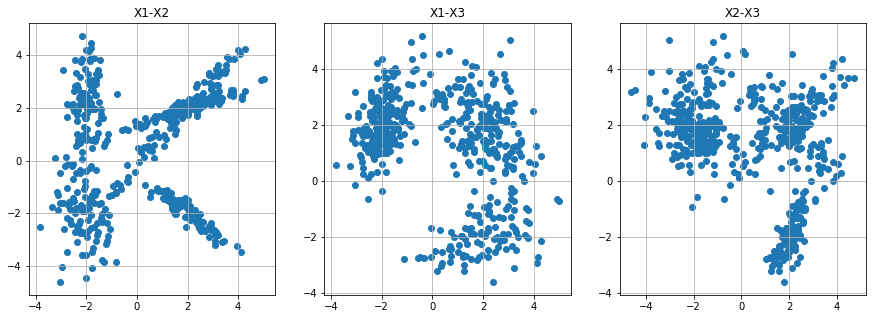

In [5]:
# Задание 1.2
# Построение графиков X1-X2, X1-X3, X2-X3
plt.figure(figsize=[15, 5])

plt.subplot(1,3,1)
plt.title("X1-X2")
plt.scatter(df['X1'], df['X2'])
plt.grid(True)

plt.subplot(1,3,2)
plt.title("X1-X3")
plt.scatter(df['X1'], df['X3'])
plt.grid(True)

plt.subplot(1,3,3)
plt.title("X2-X3")
plt.scatter(df['X2'], df['X3'])
plt.grid(True)

plt.show()

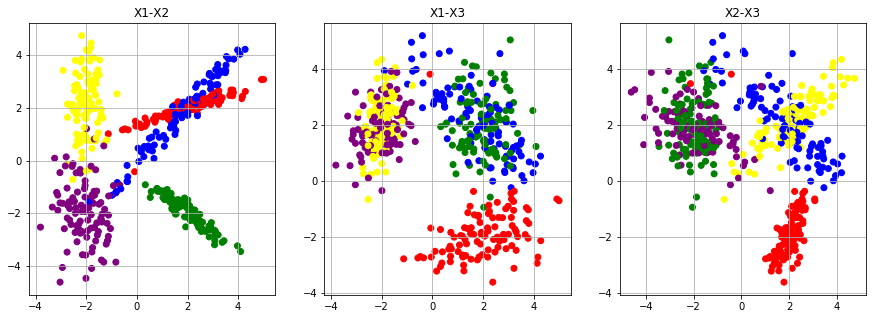

In [6]:
# Задание 1.3
# Построение графиков X1-X2-Y, X1-X3-Y, X2-X3-Y (Y - реальные кластеры)
plt.figure(figsize=[15, 5])

plt.subplot(1,3,1)
plt.title("X1-X2")
plt.scatter(df['X1'], df['X2'], c = df['Y'], cmap = clrMap)
plt.grid(True)

plt.subplot(1,3,2)
plt.title("X1-X3")
plt.scatter(df['X1'], df['X3'], c = df['Y'], cmap = clrMap)
plt.grid(True)

plt.subplot(1,3,3)
plt.title("X2-X3")
plt.scatter(df['X2'], df['X3'], c = df['Y'], cmap = clrMap)
plt.grid(True)

plt.show()

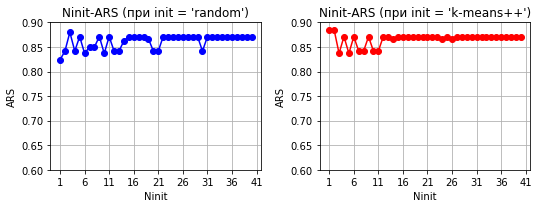

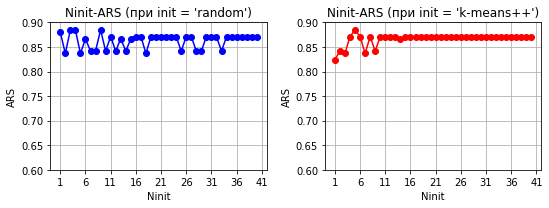

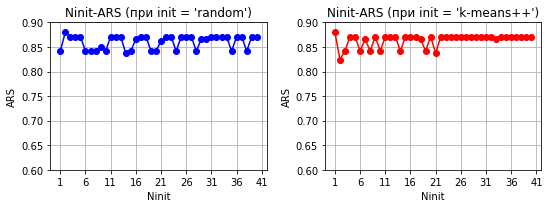

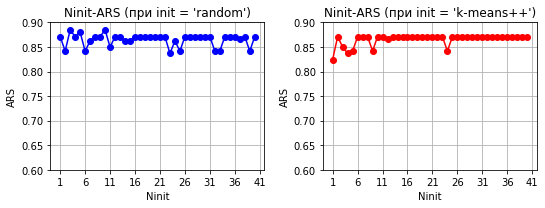

In [7]:
# Задание 1.4 и 1.5
# Кластеризация методом KMean и построение двух графиков NInit-ARS для init=Random и init=K-Means++, где
# NInit - количество повторений выполнения алгоритма кластеризации - от 1 до 40,
# ARS (adjusted_rand_score) - ошибка кластеризации,
# параметры KMean: n_clusters=5, max_iter=300, init="random", n_init=i

# повторение выполнено 5 раз

for iteration in range (1,5):    
    
    ARS_results_init_random = []
    ARS_results_init_KMeans = []

    for i in range (1,41):

        kM_model_init_random = KMeans(n_clusters=5, max_iter=300, init="random", n_init=i)
        kM_model_init_random.fit(df[['X1','X2','X3']])
        y_pred_init_random = kM_model_init_random.predict(df[['X1','X2','X3']])
        ARS_results_init_random.append(metrics.adjusted_rand_score(df['Y'], y_pred_init_random))

        kM_model_init_KMeans = KMeans(n_clusters=5, max_iter=300, init="k-means++", n_init=i)
        kM_model_init_KMeans.fit(df[['X1','X2','X3']])
        y_pred_init_KMeans = kM_model_init_KMeans.predict(df[['X1','X2','X3']])
        ARS_results_init_KMeans.append(metrics.adjusted_rand_score(df['Y'], y_pred_init_KMeans))

    plt.figure(figsize=[30, 3])

    plt.subplot(1,8,2*iteration-1)
    plt.title("Ninit-ARS (при init = 'random')")
    plt.xlabel("Ninit")
    plt.ylabel("ARS")
    plt.xticks(np.arange(1, 42, step=5)) 
    plt.plot(np.arange(1, 41), ARS_results_init_random, "b-o")
    plt.grid(True)
    plt.ylim([0.6,0.9])

    plt.subplot(1,8,2*iteration)
    plt.title("Ninit-ARS (при init = 'k-means++')")
    plt.xlabel("Ninit")
    plt.ylabel("ARS")
    plt.xticks(np.arange(1, 42, step=5)) 
    plt.plot(np.arange(1, 41), ARS_results_init_KMeans, "r-o")
    plt.grid(True)
    plt.ylim([0.6,0.9])
    
    plt.tight_layout()


Выводы: 

1) При малом количестве n_iter результат работы алгоритма имеет сильный разброс по точности: это происходит из за того, что начальные центры кластеров выставляются случайным образом и есть вероятность, что центры кластеров могут быть определены неточно. Увеличивая количество попыток разной расстановки начальных точек - с большей степенью вероятности можно найти самые точные центры кластеров.

2) При большом количестве n_iter алгоритм сходится к одному значению точности, равному примерно 0.87, что подтвержает написанное в п.1.

3) При настройке init="k-means++" результат работы алгоритма сходится за меньший n_init, чем при настройке init = "Random"

<p><b>Задание 2</b></p>

<ol>
    <li>Загрузить исходные данные - файл <b>"Cluster_A8_T2.csv"</b></li>
    <li>Построить графики X1-X2, X1-X3, X2-X3</li>
    <li>Произвести кластеризацию методом KMean и построить график NCluster-Inertia, где
<br><b>NCluster</b> - количество кластеров,
<br><b>Inertia</b> - сумма расстояний наблюдений до их ближайших центров кластеров,
<br><b>Параметры</b> KMean: n_clusters=i, max_iter=300, init="k-means++", random_state=0, n_init=20</li>
    <li>Выбрать подходящее количество кластеров</li>
    <li>Построить графики X1-X2, X1-X3, X2-X3 и X1-X2-Y_pred, X1-X3-Y_pred, X2-X3-Y_pred (Y_pred - предсказанные кластеры)</li>
</ol>

Решение

In [8]:
# Задание 2.1
# Загрузка исходных данных - файл "Cluster_A8_T2.csv"
df2 = pd.read_csv('Cluster_A8_T2.csv')

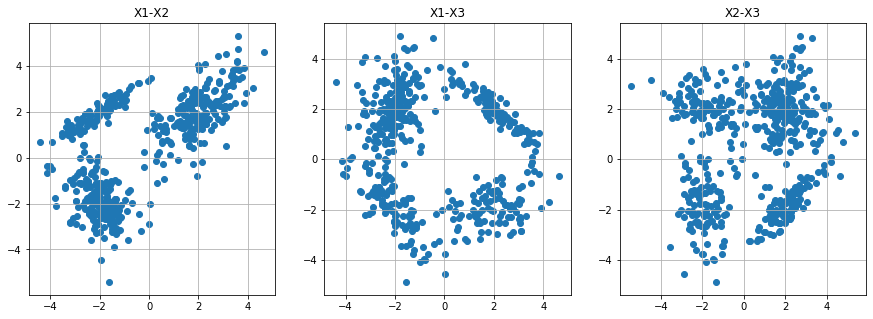

In [9]:
# Задание 2.2
# Построение графиков X1-X2, X1-X3, X2-X3
plt.figure(figsize=[15, 5])

plt.subplot(1,3,1)
plt.title("X1-X2")
plt.scatter(df2['X1'], df2['X2'])
plt.grid(True)

plt.subplot(1,3,2)
plt.title("X1-X3")
plt.scatter(df2['X1'], df2['X3'])
plt.grid(True)

plt.subplot(1,3,3)
plt.title("X2-X3")
plt.scatter(df2['X2'], df2['X3'])
plt.grid(True)

plt.show()

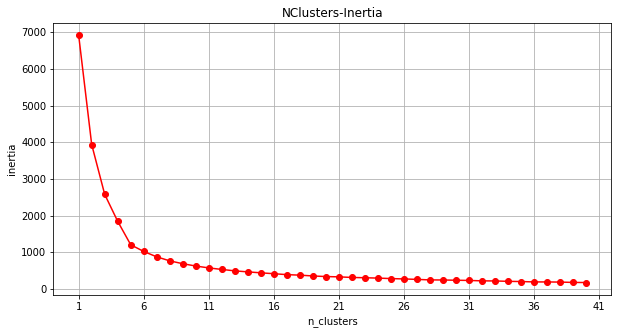

In [10]:
# Задание 2.3
# Кластеризация методом KMean и построение графика NCluster-Inertia, где
# NCluster - количество кластеров,
# Inertia - сумма расстояний наблюдений до их ближайших центров кластеров,
# Параметры KMean: n_clusters=i, max_iter=300, init="k-means++", random_state=0, n_init=20

inertia_results = []

for i in range (1,41):

    kM_model2= KMeans(n_clusters=i, max_iter=300, init="k-means++", random_state=0, n_init=20)
    kM_model2.fit(df2[['X1','X2','X3']])
    inertia_results.append(kM_model2.inertia_)


plt.figure(figsize=[10, 5])

plt.title("NClusters-Inertia")
plt.xlabel("n_clusters")
plt.ylabel("inertia")
plt.xticks(np.arange(1, 42, step=5)) 
plt.plot(np.arange(1, 41), inertia_results, "r-o")
plt.grid(True)


In [11]:
# Задание 2.4
# Выбор подходящего количества кластеров

Выбор: Методом локтя определяем количество кластеров, равное 5

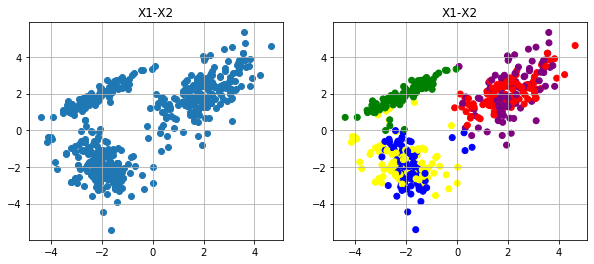

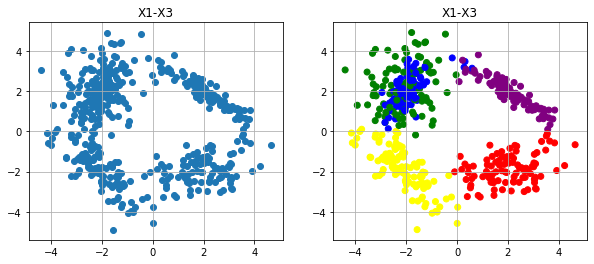

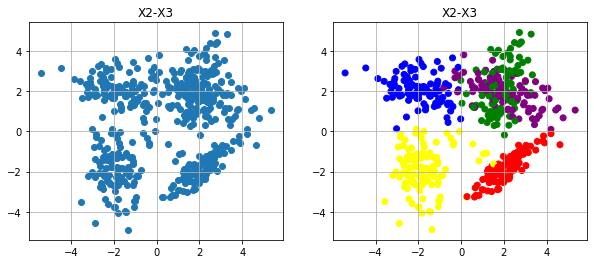

In [12]:
# Задание 2.5
# Построение графиков X1-X2, X1-X3, X2-X3 и X1-X2-Y_pred, X1-X3-Y_pred, X2-X3-Y_pred (Y_pred - предсказанные кластеры)

kM_model2 = KMeans(n_clusters=5, max_iter=300, init="k-means++", random_state=0, n_init=20)
kM_model2.fit(df2[['X1','X2','X3']])
y_pred2 = kM_model2.predict(df2[['X1','X2','X3']])

plt.figure(figsize=[10, 4])

plt.subplot(1,2,1)
plt.title("X1-X2")
plt.scatter(df2['X1'], df2['X2'])
plt.grid(True)

plt.subplot(1,2,2)
plt.title("X1-X2")
plt.scatter(df2['X1'], df2['X2'], c = y_pred2, cmap = clrMap)
plt.grid(True)

plt.figure(figsize=[10, 4])

plt.subplot(1,2,1)
plt.title("X1-X3")
plt.scatter(df2['X1'], df2['X3'])
plt.grid(True)

plt.subplot(1,2,2)
plt.title("X1-X3")
plt.scatter(df2['X1'], df2['X3'], c = y_pred2, cmap = clrMap)
plt.grid(True)

plt.figure(figsize=[10, 4])

plt.subplot(1,2,1)
plt.title("X2-X3")
plt.scatter(df2['X2'], df2['X3'])
plt.grid(True)

plt.subplot(1,2,2)
plt.title("X2-X3")
plt.scatter(df2['X2'], df2['X3'], c = y_pred2, cmap = clrMap)
plt.grid(True)

plt.show()

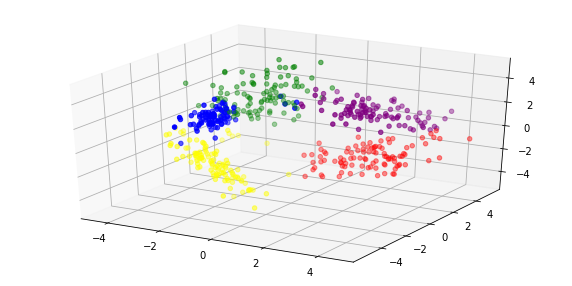

In [13]:
# Проверка в трехмерном пространстве

fig = plt.figure(figsize = [10,5])
ax = plt.axes(projection='3d')
ax.scatter(df2['X1'], df2['X2'], df2['X3'], c = y_pred2, cmap = clrMap);